In [116]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import csv
#from lmfit.models import LinearModel, LorentzianModel
%matplotlib inline
matplotlib.rcParams.update({'font.size': 6})

In [117]:
# load in data
wg_ls = []
for length in range(1,6):
    file_name = "wg_width1.03um_" + str(length) + ".csv"
    wg_dat = np.loadtxt(open(file_name, "rb"), delimiter=",", skiprows=9)
    wg_ls.append(wg_dat)
wg_arr = np.asarray(wg_ls)

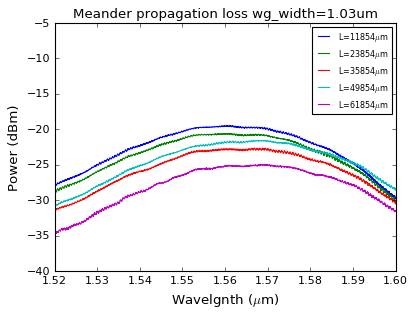

In [118]:
## Take arrays of wavelengths and power separately
power_ls = []
wavelength_ls = []
for wg in wg_arr:
    power = wg[:, 1]
    wavelength = wg[:, 0]
    power_ls.append(power)
    wavelength_ls.append(wavelength)
power_arr = np.asarray(power_ls)
wavelength_arr = np.asarray(wavelength_ls)
length_arr1 = np.array([6000 + 5654 + 200, 18000+ 5654 + 200, 30000+ 5654 + 200, 44000+ 5654 + 200,56000+ 5654+ 200])
#length_arr1 = np.array([6000 + 5654 + 200, 18000+ 5654 + 200, 30000+ 5654 + 200, 44000+ 5654 + 200])
fig, ax = plt.subplots(figsize=(5.5, 4))
plt.plot()
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
for i, (pwr, wl) in enumerate(zip(power_arr, wavelength_arr)):
    plt.plot(wl*1e6, 10*np.log10(pwr*1000),label='L={}$\mu$m'.format(length_arr1[i]))
#     print pwr[4020]
plt.title("Meander propagation loss wg_width=1.03um",fontsize=12)
plt.xlabel("Wavelgnth ($\mu$m)",fontsize=12)
plt.ylabel("Power (dBm)",fontsize=12)
plt.xlim(1.52, 1.60)
plt.ylim(-40, -5)
plt.legend()
plt.savefig("MeanderWgPropagationLoss(PowerVsWavelength).png")
plt.show()


In [119]:
## Find out the point of maximum power in the dataset and its index
power_max_ls = []
idx_of_max_ls = []
wl_of_max_ls = []
for i , (pwr, wl) in enumerate(zip(power_arr, wavelength_arr)):
    power_max = np.amax(pwr)
    power_max_ls.append(power_max)
    index_of_max = pwr.argmax()
    idx_of_max_ls.append(index_of_max)
    wavelength_of_max = wl[index_of_max]
    wl_of_max_ls.append(wavelength_of_max)
    print "Wg"+str(i)
    print "Point of maximum power: [wavelength, power] = [{0} nm, {1} W]".format(wavelength_of_max, power_max)
    print "Index of the point corresponding to maximum power: {0}".format(index_of_max)
    
power_max_arr = np.asarray(power_max_ls)
idx_of_max_arr = np.asarray(idx_of_max_ls)
wl_of_max_arr = np.asarray(wl_of_max_ls)

print idx_of_max_arr[0:4]


wl_near_peak_ls = []
power_near_peak_ls = []
power_avg_ls = []
range_size = 1000


Wg0
Point of maximum power: [wavelength, power] = [1.5606214e-06 nm, 1.12318739411e-05 W]
Index of the point corresponding to maximum power: 5529
Wg1
Point of maximum power: [wavelength, power] = [1.5608213e-06 nm, 8.73788940225e-06 W]
Index of the point corresponding to maximum power: 5539
Wg2
Point of maximum power: [wavelength, power] = [1.5667805e-06 nm, 5.43477153769e-06 W]
Index of the point corresponding to maximum power: 5837
Wg3
Point of maximum power: [wavelength, power] = [1.5686503e-06 nm, 7.02620718585e-06 W]
Index of the point corresponding to maximum power: 5932
Wg4
Point of maximum power: [wavelength, power] = [1.5691513e-06 nm, 3.20036178891e-06 W]
Index of the point corresponding to maximum power: 5957
[5529 5539 5837 5932]


Spiral0
Wavelengths range of interest (near max): 1.5220298e-06nm to1.5260327e-06nm
Average Power = 1.05790697307e-05 W
Spiral1
Wavelengths range of interest (near max): 1.5220299e-06nm to1.5260329e-06nm
Average Power = 8.30606059026e-06 W
Spiral2
Wavelengths range of interest (near max): 1.5220302e-06nm to1.5260336e-06nm
Average Power = 5.20150600778e-06 W
Spiral3
Wavelengths range of interest (near max): 1.5219996e-06nm to1.5260025e-06nm
Average Power = 6.76145178431e-06 W
Spiral4
Wavelengths range of interest (near max): 1.5220001e-06nm to1.5260027e-06nm
Average Power = 3.05642890112e-06 W
[-19.7555252  -20.80604905 -22.83870896 -21.69960045 -25.14785702]


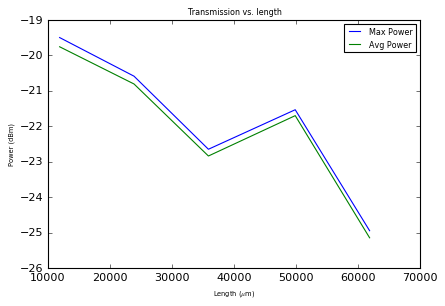

In [120]:
output = file("WgArray_Power_Avg.txt","w")
for k , (pwr, wl) in enumerate(zip(power_arr, wavelength_arr)):
    wl_near_peak = wl[5700 : 5900]
    wl_near_peak_ls.append(wl_near_peak)
    power_near_peak = pwr[5700 : 5900]
    power_near_peak_ls.append(power_near_peak)
    power_avg = np.mean(power_near_peak)
    power_avg_ls.append(power_avg)
    print "Spiral"+str(k)
    print "Wavelengths range of interest (near max): {0}nm to{1}nm".format(wl[3600], wl[3800])
    print "Average Power = {0} W".format(power_avg)
    print >>output, power_avg
    
wl_near_peak_arr = np.asarray(wl_near_peak_ls)
power_near_peak_arr = np.asarray(power_near_peak_ls)
power_avg_arr = np.asarray(power_avg_ls)

length_arr = np.array([6000 + 5654 + 200, 18000+ 5654 + 200, 30000+ 5654 + 200, 44000+ 5654 + 200, 56000+ 5654+ 200]) #Bending length 3*2*pi*R=5654, horizontal straight length = 3*60+20=200
#length_arr = np.array([6000 + 5654 + 200, 18000+ 5654 + 200, 30000+ 5654 + 200, 44000+ 5654 + 200])
power_dBm_max_arr = 10*np.log10(1000*power_max_arr)
power_dBm_avg_arr = 10*np.log10(1000*power_avg_arr)
print power_dBm_avg_arr
## Power Transmission vs. length
plt.plot()
plt.plot(length_arr, power_dBm_max_arr, label='Max Power')
plt.plot(length_arr, power_dBm_avg_arr, label='Avg Power')
plt.title("Transmission vs. length")
plt.xlabel("Length ($\mu$m)")
plt.ylabel("Power (dBm)")

plt.legend()
plt.savefig("Transmission Vs Length.png")
plt.show()

loss per length unit:  
-0.9166 dB/cm
 
-9.166e-05 x - 18.69
[-19.77628812 -20.87625264 -21.97621717 -23.25950911 -24.35947363]


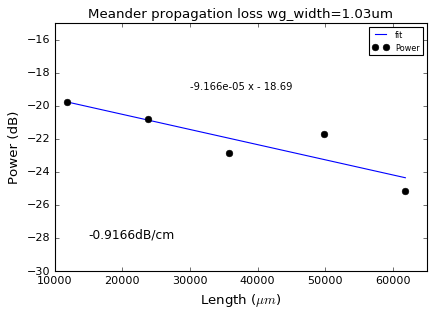

In [121]:
z1 = np.polyfit(length_arr, power_dBm_avg_arr, 1)
f_avg = np.poly1d(z1)
slope1 = np.polyder(f_avg,1)
slope_cm = slope1*1e04 #convert into loss per cm unit
#print f_avg
print "loss per length unit: {0} dB/cm".format(slope_cm)


print f_avg
print f_avg(length_arr)
x = length_arr
y_fit = f_avg(length_arr)
y_power = power_dBm_avg_arr

plt.plot(x,y_fit, label = "fit")
plt.plot(x,y_power, 'ko', label = "Power")
#plt.text(x,y_power,'{}'.format(power_dBm_avg_arr),fontsize=8)

plt.text(30000,-19,'{}'.format(f_avg),fontsize=9)   #slope
plt.text(15000,-28,'{}dB/cm'.format(slope_cm),fontsize=11)   #loss

#plt.text(30000,-33.5,"{}dB/cm".format(slope_cm),fontsize=8)
plt.title("Meander propagation loss wg_width=1.03um",fontsize=12)
plt.xlabel("Length ($\mu m$)",fontsize=12)
plt.ylabel("Power (dB)",fontsize=12)
plt.xlim(10000, 65000)
plt.ylim(-30,-15)
plt.legend()
plt.savefig("MeanderWgPropagationLoss(Power Vs Length).png")
plt.show()
plt.close()